# Práctica 3 : QFT y Sumador de Draper

Guillermo García Patiño Lenza



In [99]:
import pytket as ptk
import numpy as np
from pytket.backends.ibm import AerBackend

## Ejercicio 1 : Programar AQFT y QFT
    

In [58]:
def aplica_qft(n, circuit):
    for i in range(n):
        circuit.H(i)
        v = 0.5
        for j in range(i+1, n):
            circuit.CRz(v,j,i)
            v = v/2
        
        circuit.add_barrier([i for i in range(n)])
    return circuit

In [60]:
c = ptk.Circuit(4,4)
c = aplica_qft(4,c)
c.measure_all()

c.to_latex_file('circuitoQFT')

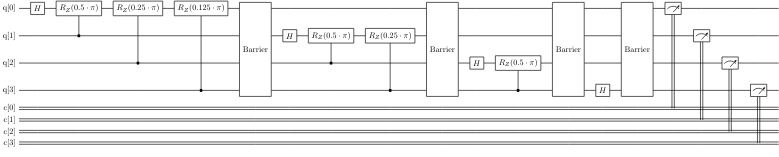

In [95]:
def aplica_aqft(n,circuit, l = 0):
    if l == 0 :
        l = int(np.ceil(np.log2(n)))
    
    print(l)
    for i in range(n):
        circuit.H(i)
        v = 0.5
        j = i+1
        while j < n and j < i+l+1: 
            circuit.CRz(v,j,i)
            v = v/2
            j = j+1
        circuit.add_barrier([i for i in range(n)])
    return circuit

In [96]:
c2 = ptk.Circuit(4,4)
c2 = aplica_aqft(4,c2)
c2.measure_all()

c2.to_latex_file('circuitoAQFT')

2


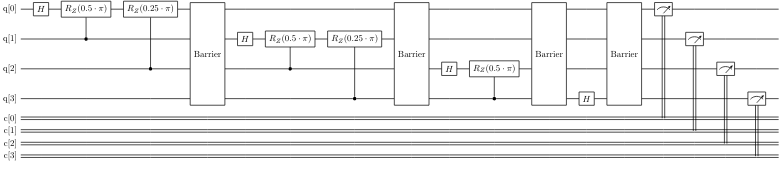

In [113]:
b = AerBackend()
b.compile_circuit(c)
handle = b.process_circuit(c, 1000)
result = b.get_result(handle)
counts = result.get_counts()
print("Resultados de la QFT : ")
print(counts)

b.compile_circuit(c2)
handle2 = b.process_circuit(c2, 1000)
result2 = b.get_result(handle2)
counts2 = result2.get_counts()
print("------------------------------------")
print("Resultados de la AQFT: ")
print(counts2)

s = 0
s2 = 0

b1_0 = [0 for i in range(4)]
b1_02 = [0 for i in range(4)]
for i in counts:
    s = s + counts[i]
    for j in range(4):
        if i[j] == 1 :
            b1_0[j] = b1_0[j] + counts[i]
    
for i in counts2:
    s2 = s2 + counts2[i]
    for j in range(4):
        if i[j] == 1 :
            b1_02[j] = b1_02[j] + counts[i]

print("------------------------------------")
print("Resultados QFT")
print("Se han obtenido 1000 resultados")
print("En todos esos resultados, cada qubit se midio a 1 el siguiente numero de veces")
print(b1_0)
print("------------------------------------")
print("Resultados AFT")
print("Se han obtenido 1000 resultados")
print("En todos esos resultados, cada qubit se midio a 1 el siguiente numero de veces")
print(b1_02)

Resultados de la QFT : 
Counter({(0, 1, 0, 1): 79, (1, 0, 0, 1): 76, (0, 0, 1, 1): 68, (0, 1, 1, 0): 67, (0, 1, 1, 1): 66, (0, 0, 0, 0): 65, (0, 1, 0, 0): 65, (0, 0, 0, 1): 62, (1, 0, 1, 1): 60, (1, 0, 0, 0): 59, (1, 1, 1, 0): 59, (1, 1, 0, 1): 58, (1, 0, 1, 0): 56, (1, 1, 1, 1): 56, (1, 1, 0, 0): 55, (0, 0, 1, 0): 49})
------------------------------------
Resultados de la AQFT: 
Counter({(0, 1, 1, 1): 77, (1, 1, 0, 0): 71, (0, 0, 0, 0): 70, (1, 1, 0, 1): 69, (0, 0, 1, 0): 66, (0, 1, 0, 1): 66, (1, 0, 1, 1): 65, (0, 1, 1, 0): 64, (1, 1, 1, 1): 62, (0, 0, 0, 1): 61, (1, 0, 0, 0): 60, (1, 0, 1, 0): 59, (1, 0, 0, 1): 55, (1, 1, 1, 0): 55, (0, 0, 1, 1): 52, (0, 1, 0, 0): 48})
------------------------------------
Resultados QFT
Se han obtenido 1000 resultados
En todos esos resultados, cada qubit se midio a 1 el siguiente numero de veces
[479, 505, 481, 525]
------------------------------------
Resultados AFT
Se han obtenido 1000 resultados
En todos esos resultados, cada qubit se midio a 1 e

### Comentario: 

Teóricamente, tanto la QFT como la AQFT transforman al dominio de la fase sin alterar las amplitudes y ponen los qubits en superposición. Esto quiere decir que tras realizar alguna de las dos transformaciones y medir cada uno de los qubits del circuito, para cada qubit debería medirse un 0 la mitad de las veces y medirse un 1 la otra mitad (puesto que los cambios en la fase son indistinguibles en este contexto).

Observando los resultados obtenidos al realizar simulaciones, se comprueba que esto es cierto, pues las probabilidades de medir un 1 son aproximadamente la mitad tanto para AQFT como para QFT

Por otro lado, a pesar de que la AQFT es una aproximación de la QFT, en este caso los resultados obtenidos para las dos operaciones no muestran diferencias debido a que, con respecto a la QFT, la AQFT solo realiza una rotación menos que la QFT y esa rotación extra que realiza la QFT es de un ángulo muy pequeño (pi/8).